### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load Data

In [4]:
PATH = '../data/merged_data.csv'
merged_data = pd.read_csv(PATH)

### Feature Engineering Step

In [5]:
from scripts.feature_engineering import FeatureEngineering

1) Generate new features

In [6]:
data = FeatureEngineering.add_features(data=merged_data)
data

,GDP,Exchange Rate,index,Price,Pct_Change,7D_MA,30D_MA,7D_Volatility,30D_Volatility,7D_Change,30D_Change
Date,,,,,,,,,,,
1987-01-01,1.748508e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-02,1.749073e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-03,1.749638e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-04,1.750203e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-05,1.750768e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,1.012251e+14,0.949624,9006.0,96.85,-0.030239,96.575714,93.685333,2.394910,2.984813,2.21,10.88
2022-11-09,1.012251e+14,0.949624,9007.0,93.05,-0.039236,96.540000,93.802000,2.453059,2.884312,-0.25,3.50
2022-11-10,1.012251e+14,0.949624,9008.0,94.25,0.012896,96.415714,93.963333,2.556840,2.762986,-0.87,4.84


2) Handle missing values

In [7]:
data = FeatureEngineering.handle_missing_values(data=data)

data.isna().sum()

GDP               0
Exchange Rate     0
index             0
Price             0
Pct_Change        0
7D_MA             0
30D_MA            0
7D_Volatility     0
30D_Volatility    0
7D_Change         0
30D_Change        0
dtype: int64

### Modeling

In [ ]:
from scripts.modeling import VAR_MODEL

1) First split the data, I didn't use sklearn's train test split because this is a time series data

In [ ]:
# Now you can proceed with your train-validation-test split
train_size = int(len(data) * 0.8)  
validation_size = int(len(data) * 0.1) 

# Define train, validation, and test sets
train = data.iloc[:train_size]
validation = data.iloc[train_size:train_size + validation_size]
test = data.iloc[train_size + validation_size:]

2) Train VAR model, as a baseline model

d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE: 461.9293015010971, RMSE: 21.492540601359746, MAE: 18.715249919369782


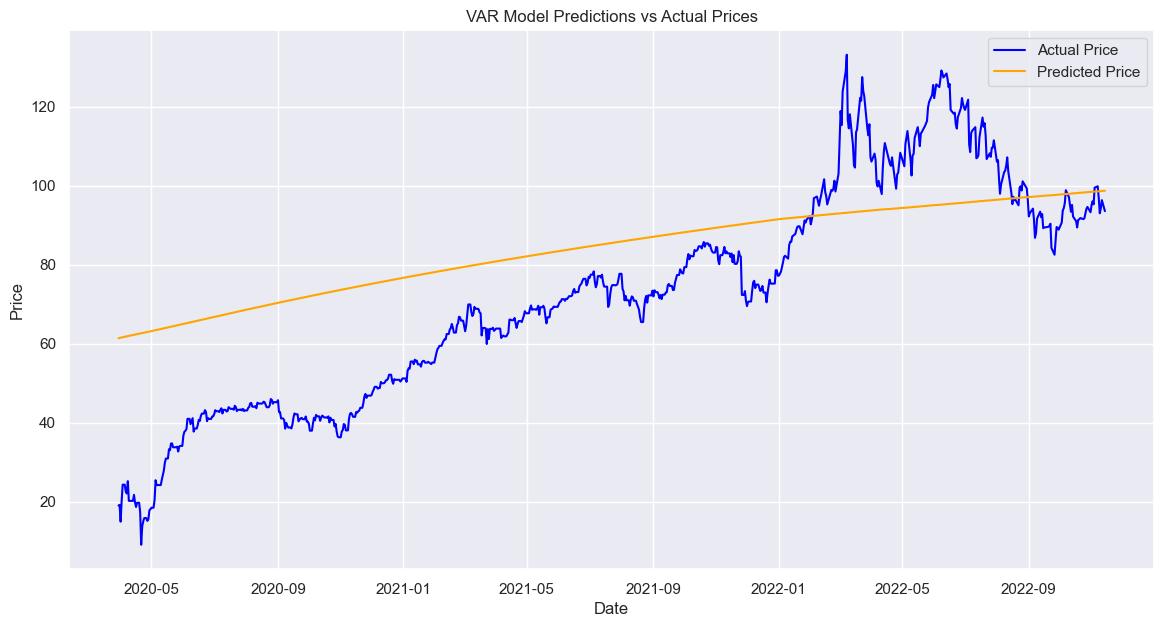

,GDP,Exchange Rate,index,Price,Pct_Change,7D_MA,30D_MA,7D_Volatility,30D_Volatility,7D_Change,30D_Change
2020-03-30,8.608301e+13,0.818994,7743.694927,61.411970,0.001006,61.620300,61.244902,1.244911,2.253965,-1.967852,3.375966
2020-03-31,8.609802e+13,0.802493,7744.381761,61.479623,0.000943,61.456015,61.349027,1.219075,2.271832,-1.150058,3.123213
2020-04-01,8.611284e+13,0.794233,7745.066693,61.544339,0.000918,61.378726,61.442744,1.192377,2.286664,-0.541185,2.811227
2020-04-02,8.612749e+13,0.790231,7745.752617,61.606832,0.000913,61.362972,61.525334,1.166681,2.298370,-0.110472,2.477568
2020-04-03,8.614200e+13,0.788415,7746.440688,61.667506,0.000916,61.388381,61.596966,1.143093,2.307099,0.177679,2.148906
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,9.675372e+13,0.693762,8337.732503,98.613095,0.000382,98.519283,98.163478,1.375429,2.771712,0.216133,0.931564
2022-11-09,9.676499e+13,0.693669,8338.422870,98.643911,0.000382,98.550145,98.194515,1.375755,2.772475,0.216027,0.931100
2022-11-10,9.677625e+13,0.693577,8339.113233,98.674712,0.000381,98.580991,98.225536,1.376079,2.773238,0.215922,0.930637
2022-11-11,9.678752e+13,0.693484,8339.803592,98.705498,0.000381,98.611823,98.256542,1.376404,2.774000,0.215816,0.930176


In [14]:
# initialize the model
var_model = VAR_MODEL(train=train, test=test)

#train the model
var_model.train_model()